<font color='blue'> Привет. Ниже мои комментарии выделены синим. </font>

# Аналитика в авиакомпании

## Описание Проекта

Eсть файлы, в которых содержатся результаты запросов:

- / datasets / query_1.csv - результат первого запроса. Содержит информацию о моделях самолетов, количестве рейсов для каждой модели самолетов в сентябре 2018 года.
- / datasets / query_3.csv - результат третьего запроса. Содержит информацию о городах полетов, среднем количестве рейсов, прибывающих в город города за день в сентябре 2018 года.

#### Необходимо изучить данные:

- Выберите 10 лучших городов по количеству рейсов;
- Составьте расписание: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- Сделайте выводы по каждому из графиков, объясните результат.

### Описание последовательности действий

Шаг 1. Предварительная обработка для двух наборов данных
    -  Импорт файлов
    -  Учебные данные
    -  Топ 10 городов по количеству рейсов
    -  Графики:
        -  Модели самолетов и количество рейсов
        -  Города и количество рейсов
        -  Топ-10 городов и количество рейсов

Шаг 2. Проверка гипотез
    -  Гипотеза 1. Спрос на билеты во время фестивалей не отличается от спроса в обычное время

Шаг 3. Общий вывод

# Шаг 1. Предварительная обработка для двух наборов данных

## Импорт файлов

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [8]:
data_query_1 = pd.read_csv('/datasets/query_1.csv')
data_query_3 = pd.read_csv('/datasets/query_3.csv')
data_query_last = pd.read_csv('/datasets/query_last.csv')

## Учебные данные

In [9]:
data_query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [11]:
data_query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [12]:
data_query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [13]:
data_query_1.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [14]:
data_query_3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [15]:
data_query_1.isna().sum()

model             0
flights_amount    0
dtype: int64

In [16]:
data_query_1.duplicated().sum()

0

In [17]:
data_query_3.isna().sum()

city               0
average_flights    0
dtype: int64

In [18]:
data_query_3.duplicated().sum()

0

Таблица data_query_1 2 столбца, 8 строк.
В таблице data_query_3 2 столбца, 101 строка.
В двух столбцах таблицы тип данных объекта:
   - в таблице data_query_1 в объекте columnmodel
   - в таблице data_query_3 в объекте columncity

Все представленные столбцы таблицы не имеют пропущенных значений.
Поскольку объект типа это str - я думаю, что ничего не нужно менять.

## Топ 10 городов по количеству рейсов

In [19]:
data_query_3.sort_values(by='average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


## Графики:

### Модели самолетов и количество рейсов

Text(0, 0.5, 'Модели самолетов')

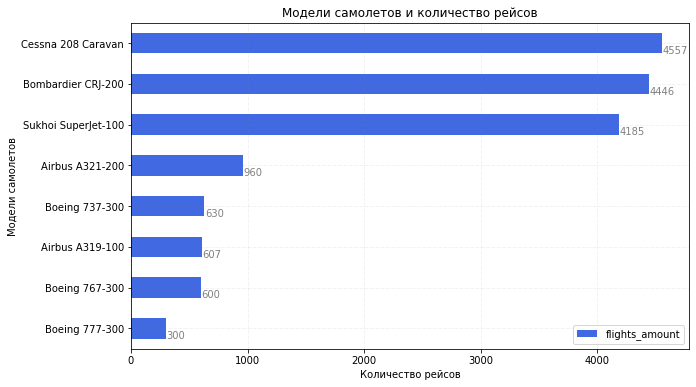

In [21]:
df = data_query_1.sort_values(by='flights_amount', ascending=False).head(10)
ax = df.plot.barh(x = 'model', figsize=(10,6), color="royalblue")

ax.invert_yaxis()
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='light', color='grey')
    
plt.title('Модели самолетов и количество рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Модели самолетов')

### Города и количество рейсов

Text(0, 0.5, 'Города')

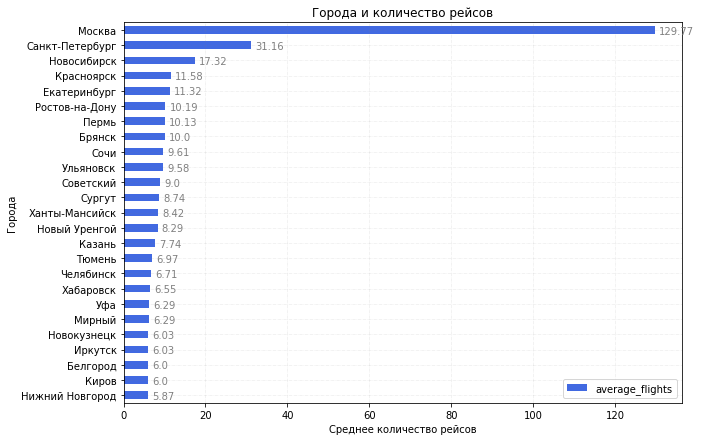

In [22]:
df = data_query_3.sort_values(by='average_flights', ascending=False).head(25)
ax = df.plot.barh(x = 'city', figsize=(10, 7), color="royalblue")

ax.invert_yaxis()
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='light', color='grey')
    
plt.title('Города и количество рейсов')
plt.xlabel('Среднее количество рейсов')
plt.ylabel('Города')

Из-за того, что количество городов велико - да, визуализация на графике все равно будет холстом, для более конкретного сравнения нам понадобится сравнение городов по среднему количеству рейсов.

### Топ 10 городов и количество рейсов

Text(0, 0.5, 'Топ-10 городов и количество рейсов')

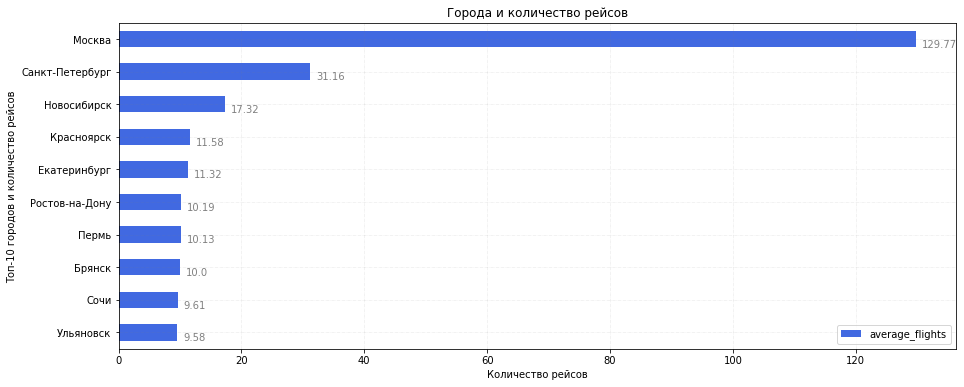

In [23]:
df = data_query_3.sort_values(by='average_flights', ascending=False).head(10)
ax = df.plot.barh(x = 'city', figsize=(15,6), color="royalblue")

ax.invert_yaxis()
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='light', color='grey')
    
plt.title('Города и количество рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Топ-10 городов и количество рейсов')

<font color='blue'> Все графики построены верно. Типы и параметры диаг. </font>

# Шаг 2. Проверка гипотез

## Гипотеза 1. Спрос на билеты во время фестивалей не отличается от спроса в обычное время

Задания:

- Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»;
- Установите альфа-пороговое значение самостоятельно;
- Объясните, как вы сформулировали нулевую и альтернативную гипотезы;
- Объясните, какие критерии использовались для проверки гипотез и почему.

Данные:

- /datasets/query_last.csv - результат последнего запроса. Содержит следующую информацию:
- week_number - номер недели;
- ticket_amount - количество проданных билетов за неделю;
- festival_week - есть ли фестиваль на этой неделе;
- festival_name - название фестиваля.

Поскольку наши гипотезы предполагают возможность отклонения среднего спроса на билеты от ожидаемого в обоих направлениях, гипотеза является двусторонней. Вам необходимо рассмотреть общий результат последнего запроса - /datasets/query_last.csv.

Я использую t-критерий Стьюдента, потому что два сравниваемых образца не зависят друг от друга.
Пороговое значение альфа (критический уровень статистической значимости) устанавливается стандартным - равным 5%.


Гипотезы:
Гипотеза H₀:
Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время


Альтернативная гипотеза H₁:
Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время

In [25]:
data_query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [26]:
data_query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [30]:
alpha = 0.05
festivals = data_query_last.query('festival_week.notnull()', engine='python')['ticket_amount']
non_festivals = data_query_last.query('festival_week.isnull()', engine='python')['ticket_amount']

results = st.ttest_ind(festivals, non_festivals, equal_var=False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отклонить нулевую гипотезу")
else:
    print("Не удалось отклонить нулевую гипотезу")

p-value: 0.377432493172683
Failed to reject the null hypothesis


In [32]:
print("Получили p-value равное: {:.0%}.".format(results.pvalue))

Получили p-value равное: 38%.


Средний спрос на билеты во время фестивалей и в обычное время не одинаков. Но, учитывая значение p-значения, можно сказать, что такая разница в среднем спросе с вероятностью 38% может быть получена случайно.

Примите альтернативную гипотезу H₁:
Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время.

# Шаг 3. Общий вывод

На основании анализа спроса на билеты можно сделать следующие выводы:

- В том числе 10 городов по количеству рейсов: - Конечно, есть города с населением более миллиона человек и города федерального значения (таможня, туризм и т. Д.): Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов- на Дону, Перми, Брянске, Сочи, Ульяновске.

- Модели самолетов и количество рейсов: - Самой популярной была модель самолета Cessna 208 Caravan; В общей сложности эти модели завершено 4557. - На втором месте стоит модель Doombardier SKO-200 - 4446 рейсов. - На третьем месте находится модель Sukhoi Superjet-100 - 4185 рейсов. Гипотеза о том, что: спрос на билеты во время фестивалей не отличается от спроса в обычное время - не подтверждается. Это логично, так как любые события увеличивают количество рейсов => билетов => и, в общем, людей.

Рекомендации:

- Организуйте мероприятия не только в городах с населением более миллиона человек и охватите новые территориальные рынки.